In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

sns.set(style="whitegrid")

In [2]:
# Step 1: Load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# Replace 0 values with median (for specific columns)
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols:
    df[c] = df[c].replace(0, df[c].median())

In [4]:
# Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [5]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Predictions
pred = knn.predict(X_test)

In [9]:
# Evaluate
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
err = 1 - acc

print(f"Accuracy: {acc:.3f}")
print(f"Error: {err:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")

Accuracy: 0.747
Error: 0.253
Precision: 0.643
Recall: 0.655


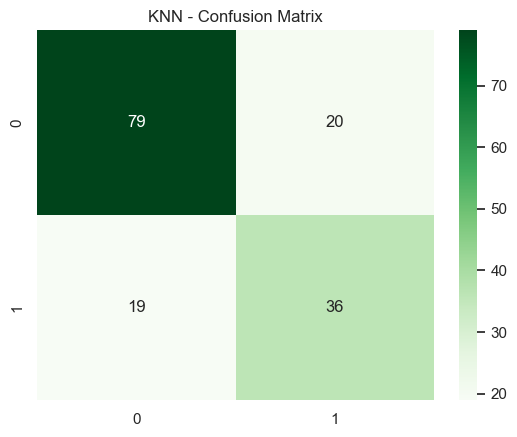

In [10]:
# Show confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("KNN - Confusion Matrix")
plt.show()

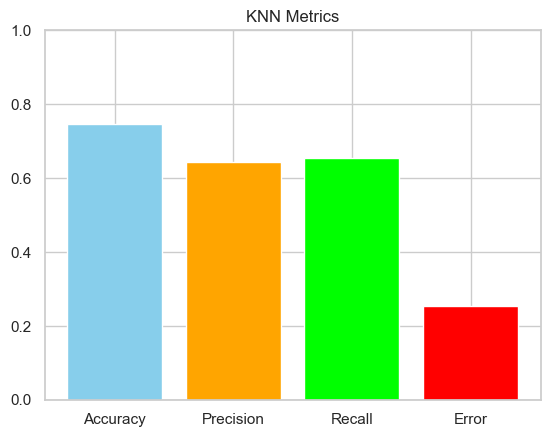

In [11]:
# Bar chart of metrics
plt.bar(['Accuracy','Precision','Recall','Error'], [acc, prec, rec, err], color=['skyblue','orange','lime','red'])
plt.title("KNN Metrics")
plt.ylim(0,1)
plt.show()